# Example notebok for SSH Variability application

This notebook demonstrates how the SSH variability application works when the script is run. 

In [2]:
import os

# Specify the path to your desired working directory
working_directory = '/work/ab0995/a270223/AQUA/diagnostics/SSH/'

# Change the working directory
os.chdir(working_directory)

In [1]:
import sys
# temporary hack if your env-dummy.yml
# does not install your diagnostic.
sys.path.insert(0, '../')
from ssh_class import sshVariability

In [5]:
! hostname
! pwd

l10695.lvt.dkrz.de
/work/ab0995/a270223/AQUA/diagnostics/SSH/notebooks


CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 10.5 µs


/home/a/a270223/mambaforge/envs/aqua/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36327 instead
  warnings.warn(


Dask Dashboard URL: http://127.0.0.1:36327/status
Workers=16, Memory=235.37 GiB


2023-06-12 12:25:10 :: Reader :: WARNING  -> No fixes available for model AVISO


AVISO data spans from  1993-01-01T00:00:00.000000000 to  2022-06-23T00:00:00.000000000
Now computing std on AVISO ssh for the provided timespan
computation for AVISO ssh complete, saving output file


/home/a/a270223/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


Now loading data for other models to compare against AVISO ssh variability
initializing AQUA reader to read the model inputs for {'name': 'FESOM', 'experiment': 'tco2559-ng5', 'source': 'original_2d', 'regrid': 'r005', 'variable': 'ssh', 'zoom': None, 'timespan': ['2020-01-20', '2020-12-31']}
Getting SSH data complete for FESOM, now computing standard deviation on the default timestamp
computation complete, saving output file
output saved, now regridding using the aqua regridder
initializing AQUA reader to read the model inputs for {'name': 'ICON', 'experiment': 'ngc3026', 'source': 'P1D', 'regrid': 'r100', 'variable': 'zos', 'zoom': 7, 'timespan': ['2020-01-20', '2020-12-31']}
Getting SSH data complete for ICON, now computing standard deviation on the default timestamp
computation complete, saving output file


/home/a/a270223/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


output saved, now regridding using the aqua regridder
visualizing the data in subplots
Saving plots as JPEG output file


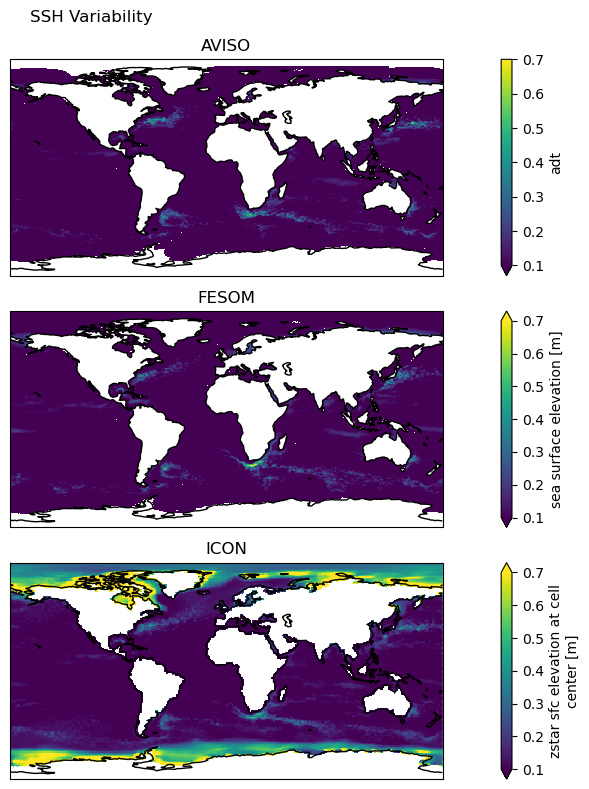

In [2]:
analyzer = sshVariability('../config.yml')
analyzer.run()

Double-Checking the output files.

In [4]:
import xarray as xr

Checking the output files, if they have the data that is required.

In [5]:
# Specify the path to the NetCDF file output
file_path = '../output/AVISO_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    adt        (latitude, longitude) float64 ...

In [6]:
# Specify the path to the NetCDF file output
file_path = '../output/FESOM_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:  (nod2: 7402886)
Dimensions without coordinates: nod2
Data variables:
    ssh      (nod2) float32 ...

In [7]:
# Specify the path to the NetCDF file output
file_path = '../output/ICON_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:  (cell: 196608)
Dimensions without coordinates: cell
Data variables:
    zos      (cell) float32 ...